In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df=pd.read_csv("train.csv")

In [141]:
temp_df=df[['question1','question2','is_duplicate']]

In [142]:
ques_df=temp_df.sample(90000)
ques_df.head()

,question1,question2,is_duplicate
13688,What is best career option?,What are some good career options?,1
306444,"If I am a Graduate in Project Management, What...",About lovers fight?,0
307269,What are some element examples that are solids...,What are the elements that are solid at room t...,1
159786,"If a question doesn't need improvement, why do...",Why do all of my questions on Quora need impro...,1
184938,How can I speak English fluently and fast?,How can I speak English more fluently?,1


In [143]:
ques_df.dropna(inplace=True)

In [144]:
ques_df.isnull().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

In [146]:
ques_df.sample(10)

,question1,question2,is_duplicate
218667,Can I mix water with milk?,Why do some bakers instead of adding water to ...,0
134202,How can I add or remove a topic on Quora?,How do you delete a topic on Quora?,0
248131,What are some unexpected things first-time vis...,What are some unexpected things first-time vis...,0
128729,How do you control your emotions in public?,How do I control my emotion and sadness?,1
142293,What are the difference between 32 bit and 64 ...,What is the difference between a 32-bit and 64...,1
236984,What's the worst thing that ever happens to yo...,What is the worst thing ever happened to you f...,1
195291,How good looking are you in your own opinion o...,How much will you rate your physical appearanc...,1
355957,What is the time span to apply at Facebook again?,How can I unblock someone on Facebook? I've tr...,0
350611,Is flipping domain names still a good business...,Is bying and selling the domain names a good b...,1
146105,How do you factory reset a Toshiba Satellite Pro?,What are some ways of restoring a Toshiba lapt...,1


#### Add 7 more features which better describe the data

In [113]:
def count_common(ques1,ques2):
    li1=ques1.split(" ")
    li2=ques2.split(" ")
    li1=set(li1)
    li2=set(li2)
    return len(li1 & li2)

In [114]:
def get_total_words(ques1,ques2):
    li1=ques1.split(" ")
    li2=ques2.split(" ")
    li1=set(li1)
    li2=set(li2)
    return len(li1) +len(li2)

In [115]:
new_features=['q1_len','q2_len','q1_words','q2_words','words_common','words_total','words_share']

In [147]:
ques_df['q1_len']=ques_df['question1'].apply(len)


In [148]:
ques_df['q2_len']=ques_df['question2'].apply(len)

In [149]:
ques_df['q1_words']=ques_df['question1'].apply(lambda x: len(x.split(" ")))

In [157]:
ques_df['q2_words']=ques_df['question2'].apply(lambda x: len(x.split(" ")))

In [150]:
ques_df['words_common']=ques_df.apply(lambda row:count_common(row['question1'],row['question2']),axis=1)

In [151]:
ques_df['words_total']=ques_df.apply(lambda row:get_total_words(row['question1'],row['question2']),axis=1)

In [152]:
ques_df['words_share']=ques_df['words_common']+ques_df['words_total']

In [158]:
ques_df.sample(10)

,question1,question2,is_duplicate,q1_len,q2_len,q1_words,words_common,words_total,words_share,q2_words
220123,How do I read quickly?,How can I read books more quickly with full co...,0,22,58,5,3,15,18,10
289242,What are servers?,What's a server made of?,0,17,24,3,0,8,8,5
277931,How do I become a social worker?,How do I become a social worker in Australia?,0,32,45,7,6,16,22,9
185168,Who require annexure M for passport?,How do I prepare for CAT 2016 in last one mont...,0,36,92,6,1,25,26,19
196947,What is new moon?,When is the new moon?,1,17,21,4,3,9,12,5
226491,Which Company provides photobooth service in S...,Who provides affordable photobooth service in ...,0,52,53,7,5,14,19,7
210150,What is the best Python learning book for begi...,What is the best book for learning Python easily?,1,52,49,9,8,18,26,9
158743,What does it feel like to sit for the South Ko...,Can I sit for the entrance exam after passing ...,0,73,92,14,4,31,35,17
102840,What are the differences between personal pron...,What are first person pronouns?,0,70,31,9,2,14,16,5
173760,What will they do to you if you jailbreak your...,How do you jailbreak an iPad?,0,52,29,11,4,16,20,6


In [159]:
ques_df.shape


(90000, 10)

In [160]:
ques_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90000 entries, 13688 to 184086
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   question1     90000 non-null  object
 1   question2     90000 non-null  object
 2   is_duplicate  90000 non-null  int64 
 3   q1_len        90000 non-null  int64 
 4   q2_len        90000 non-null  int64 
 5   q1_words      90000 non-null  int64 
 6   words_common  90000 non-null  int64 
 7   words_total   90000 non-null  int64 
 8   words_share   90000 non-null  int64 
 9   q2_words      90000 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 7.6+ MB


In [161]:
ques_df["question1"]=ques_df["question1"].str.lower()

In [162]:
ques_df["question2"]=ques_df["question2"].str.lower()

In [127]:
for q in ques_df["question1"]:
    if not isinstance(q,str):
        print(q)

In [184]:
ques_df.sample(3)

,question1,question2,is_duplicate,q1_len,q2_len,q1_words,words_common,words_total,words_share,q2_words
354863,what can be done with expired toothpaste?,does toothpaste expire?,0,41,23,7,0,10,10,3
72786,what is meant by rheostatic braking?,what is meant by rheostatic braking??,1,36,37,6,5,12,17,6
22026,two objects in space will fall toward each oth...,"if the universe is 16 billion years old, what ...",0,150,76,25,3,38,41,15


In [185]:
final_df=ques_df.drop(columns=["question1","question2"])
final_df.sample(3)

,is_duplicate,q1_len,q2_len,q1_words,words_common,words_total,words_share,q2_words
1229,0,96,52,21,1,30,31,10
152650,1,63,69,12,8,26,34,15
47059,1,58,54,11,5,19,24,9


In [186]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [187]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(90000, 6000)

In [188]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()


(90000, 6008)


,is_duplicate,q1_len,q2_len,q1_words,words_common,words_total,words_share,q2_words,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
13688,1,27,34,5,2,11,13,6,0,0,...,0,0,0,0,0,0,0,0,0,0
306444,0,78,19,14,0,16,16,3,0,0,...,0,0,0,0,0,0,0,0,0,0
307269,1,67,57,11,6,19,25,10,0,0,...,0,0,0,0,0,0,0,0,0,0
159786,1,80,53,13,2,23,25,10,0,0,...,0,0,0,0,0,0,0,0,0,0
184938,1,42,38,8,5,15,20,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
final_df.columns=final_df.columns.astype(str)

In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:],final_df.iloc[:,0],test_size=0.2)

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7783333333333333

In [195]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(np.array(X_train),y_train)
y_pred2=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7783333333333333

### Feature Analysis

minimum characters 1
maximum characters 370
average num of characters 59


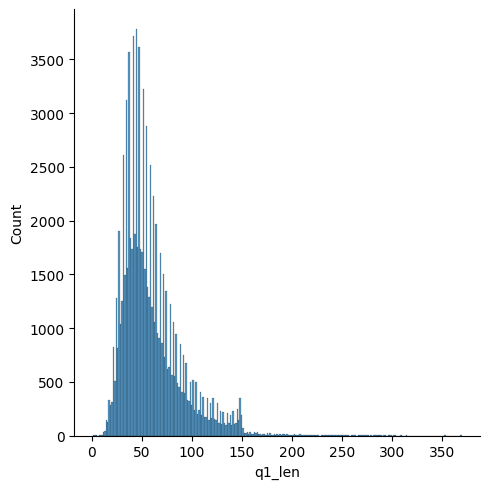

In [198]:
sns.displot(ques_df['q1_len'])
print('minimum characters',ques_df['q1_len'].min())
print('maximum characters',ques_df['q1_len'].max())
print('average num of characters',int(ques_df['q1_len'].mean()))


minimum characters 1
maximum characters 1169
average num of characters 60


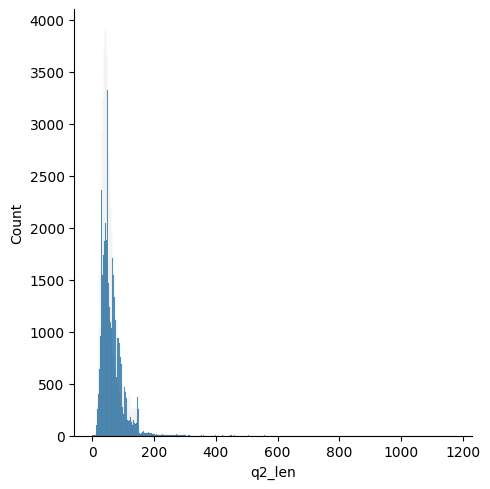

In [199]:
sns.displot(ques_df['q2_len'])
print('minimum characters',ques_df['q2_len'].min())
print('maximum characters',ques_df['q2_len'].max())
print('average num of characters',int(ques_df['q2_len'].mean()))


minimum words 1
maximum words 71
average num of words 10


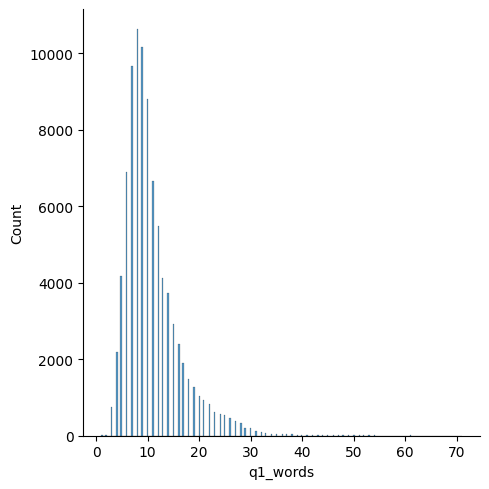

In [208]:
sns.displot(ques_df['q1_words'])
print('minimum words',ques_df['q1_words'].min())
print('maximum words',ques_df['q1_words'].max())
print('average num of words',int(ques_df['q1_words'].mean()))


minimum words 1
maximum words 237
average num of words 11


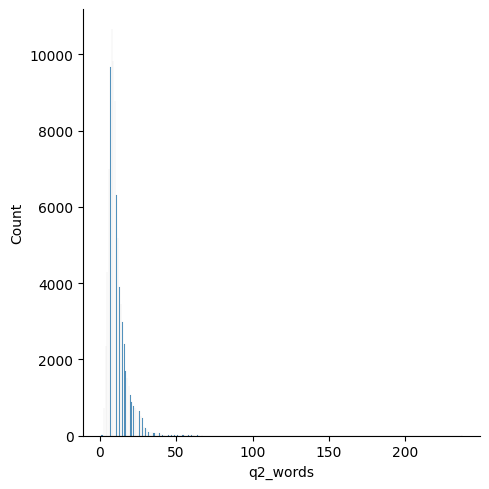

In [210]:
sns.displot(ques_df['q2_words'])
print('minimum words',ques_df['q2_words'].min())
print('maximum words',ques_df['q2_words'].max())
print('average num of words',int(ques_df['q2_words'].mean()))


C:\Users\dasoj\AppData\Local\Temp\ipykernel_12908\493818816.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ques_df[ques_df['is_duplicate'] == 0]['words_common'],label='non duplicate')
C:\Users\dasoj\AppData\Local\Temp\ipykernel_12908\493818816.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

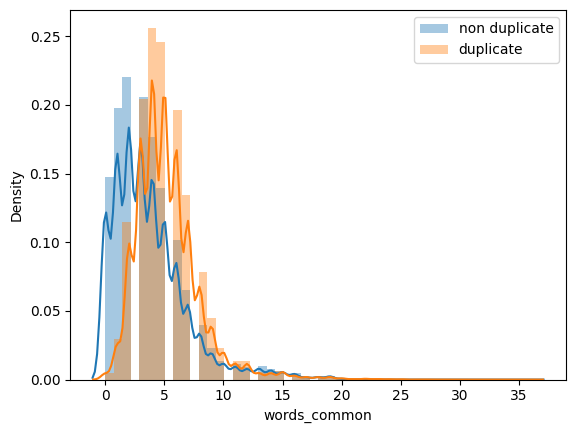

In [213]:
sns.distplot(ques_df[ques_df['is_duplicate'] == 0]['words_common'],label='non duplicate')
sns.distplot(ques_df[ques_df['is_duplicate'] == 1]['words_common'],label='duplicate')
plt.legend()
plt.show()


C:\Users\dasoj\AppData\Local\Temp\ipykernel_12908\3214409666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ques_df[ques_df['is_duplicate'] == 0]['words_total'],label='non duplicate')
C:\Users\dasoj\AppData\Local\Temp\ipykernel_12908\3214409666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

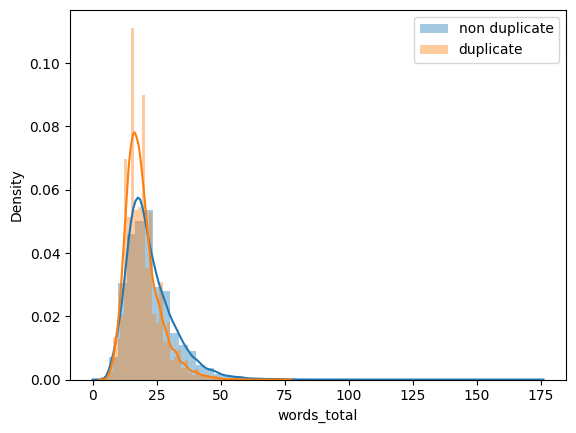

In [214]:
sns.distplot(ques_df[ques_df['is_duplicate'] == 0]['words_total'],label='non duplicate')
sns.distplot(ques_df[ques_df['is_duplicate'] == 1]['words_total'],label='duplicate')
plt.legend()
plt.show()


C:\Users\dasoj\AppData\Local\Temp\ipykernel_12908\3732101880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ques_df[ques_df['is_duplicate'] == 0]['words_share'],label='non duplicate')
C:\Users\dasoj\AppData\Local\Temp\ipykernel_12908\3732101880.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

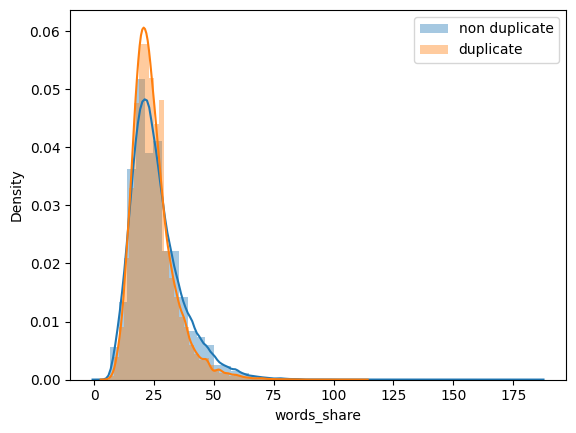

In [215]:
sns.distplot(ques_df[ques_df['is_duplicate'] == 0]['words_share'],label='non duplicate')
sns.distplot(ques_df[ques_df['is_duplicate'] == 1]['words_share'],label='duplicate')
plt.legend()
plt.show()


### ended up with 78% accuracy after basic eature engineering